# changelog

mas de 2 elementos, eliminar lineas precautorias

In [1]:
import datetime as dt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages as pdf
import seaborn as sns
sns.set_style("darkgrid")

import requests 
import json
import importlib
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import os

ruta_archivo = os.getcwd()
ruta_base =os.path.dirname(ruta_archivo)

## Parametros

In [2]:
carpeta_tendencias = '/../02_Archivos/GraficasTendencias'

# faenas = ['Radomiro Tomic','Antucoya','Quebrada Blanca','Collahuasi','Gaby','Los Pelambres','Caserones','Cerro Negro Norte','Andina','Centinela','Ministro Hales','Escondida','Sierra Gorda','Spence','Lomas Bayas']
# 'Collahuasi', 'Lomas Bayas', 'Radomiro Tomic', 'SPENCE', 'Gaby','Cerro Negro Norte', 'Antucoya', 'Sierra Gorda', 'Qblanca','Caserones', 'Andina', 'Los Pelambres', 'Chuquicamata','Esperanza Sur', 'Esperanza', 'Ministro Hales'
faena ='Cerro Negro Norte'

# Equipos a graficar
# flota_completa = False 
# flotas ='WA 1200'
# True: Graficas todos los equipos de 'flotas', no considera 'lista_unidades'
# False: Grafica equipos de 'lista_unidades'
lista_equipos = ['CE05']

# Fecha minima de datos2022-07-20
#fecha  ='2021-01-19'
desde  ='2023-02-20'
hoy = dt.date.today()
hasta = hoy.strftime('%Y-%m-%d')
# hasta = ""

# elementos = ['AL', 'Agua', 'B', 'CA', 'CR', 'CU', 'Diluc.', 'FE', 'Hollin','Ind.PQ.', 'K', 'MG', 'MO', 'NI', 'Nitrac.', 'Oxid.', 'P', 'PB', 'SI', 'SN', 'Sulf.', 'TBN', 'Visc 100', 'Visc.40', 'ZN']
grupo_elementos = [['SI','AL'],['NA','K'],['B'],['Visc 100'],['Diluc.'],['Agua'],['TBN'],['Hollin'],['Oxid.','Sulf.','Nitrac.'],['Ind.PQ.'],['CR'],['CU'],['FE'],['PB'],['ZN','P'],['MG'],['CA'],[ 'MO']]

In [3]:
subcarpeta = True


In [4]:
guardar_tendencias = os.path.abspath(ruta_base + carpeta_tendencias)

carpeta_scaa = 'DatosScaa'
carpeta_scaa = os.path.abspath(ruta_base + '/../02_Archivos/' + carpeta_scaa)
carpeta_limites = 'DatosLimites'
carpeta_limites = os.path.abspath(ruta_base + '/../02_Archivos/' + carpeta_limites)

## Datos Limites

In [5]:
# Leer limites condenatorios
datos_limites = pd.read_csv(carpeta_limites +'\\limites.csv',keep_default_na=False)

In [6]:
datos_limites.elemento.unique()

array(['AL', 'Agua', 'B', 'CA', 'CR', 'CU', 'Diluc.', 'FE', 'Hollin',
       'Ind.PQ.', 'K', 'MG', 'MO', 'NA', 'NI', 'Nitrac.', 'Oxid.', 'P',
       'PB', 'Pto.Infl.', 'SI', 'SN', 'Sulf.', 'TBN', 'Visc 100',
       'Visc.40', 'ZN'], dtype=object)

In [7]:
limites = datos_limites.copy()
limites = limites[limites.faena == faena]

limites['desde'] = pd.to_datetime(limites['desde'])  
limites['hasta'] = pd.to_datetime(limites['hasta']) 

limites = limites[limites.limitecritico.astype(bool)]

filtro_fecha_limite = ((limites['desde'] > desde) & (limites['desde'] <= hasta)) | (limites['hasta'] >= desde)
limites = limites.loc[filtro_fecha_limite]

# limites = limites[limites.flotas == flota]

filtro_flotas = '|'.join([x.replace(" ", ".*") for x in limites.flota.unique()])

In [8]:
limites

,faena,flota,elemento,limiteprecaucion,limitecritico,desde,hasta
1541,Cerro Negro Norte,830 E,AL,1.7000000000000002,2.4,2022-11-16,2023-05-22
1542,Cerro Negro Norte,830 E,AL,1.0,2.0,2023-05-22,2024-01-01
1548,Cerro Negro Norte,830 E,Agua,0.1,0.2,2022-11-16,2023-05-22
1549,Cerro Negro Norte,830 E,Agua,0.1,0.2,2023-05-22,2024-01-01
1555,Cerro Negro Norte,830 E,B,45.7,54.4,2022-11-16,2023-05-22
...,...,...,...,...,...,...,...
1915,Cerro Negro Norte,WA 1200,Visc 100,13.9,15.2,2022-11-16,2023-05-22
1916,Cerro Negro Norte,WA 1200,Visc 100,13.7,15.0,2023-05-22,2024-01-01
1920,Cerro Negro Norte,WA 1200,Visc.40,12.0,16.0,2020-01-01,2024-01-01
1921,Cerro Negro Norte,WA 1200,ZN,1043.7,1102.9,2022-11-16,2023-05-22


In [9]:
limites.elemento.unique()

array(['AL', 'Agua', 'B', 'CA', 'CR', 'CU', 'Diluc.', 'FE', 'Hollin',
       'Ind.PQ.', 'K', 'MG', 'MO', 'NA', 'NI', 'Nitrac.', 'Oxid.', 'P',
       'PB', 'Pto.Infl.', 'SI', 'SN', 'Sulf.', 'TBN', 'Visc 100', 'ZN',
       'Visc.40'], dtype=object)

## Datos SCAA

In [10]:
datos_scaa = pd.read_csv(carpeta_scaa + '\\consolidado_scaa.csv', index_col='Nro.Muestra')

In [11]:
datos_scaa[datos_scaa.Faena == 'Chuquicamata'].Equipo.unique()

array(['890.0', '893.0', '894.0'], dtype=object)

In [12]:
scaa = datos_scaa.copy()

# filtro faena
scaa = scaa[scaa.Faena == faena]
scaa = scaa[scaa.Componente == 'Motor Diesel']
scaa = scaa[scaa.Flota.str.contains(filtro_flotas)]
scaa = scaa[~scaa['ZN'].isna()]
scaa['Equipo'] = pd.Series(scaa['Equipo'].str.split('.').str[0], dtype="string")
# pd.Series(scaa['Equipo'], dtype="string").applymap(lambda x: '{0:.0f}'.format(x))

scaa['Fecha Muestra'] = pd.to_datetime(scaa['Fecha Muestra'],format='%d/%m/%Y')
# Filtro fechas

filtro_fecha_scaa = (scaa['Fecha Muestra'] > desde) & (scaa['Fecha Muestra'] <= hasta)
scaa = scaa.loc[filtro_fecha_scaa]

scaa.sort_values(by='Fecha Muestra', inplace = True) 

scaa.reset_index(drop=True, inplace=True)

In [13]:
# leer unidades de elementos
f = open(carpeta_limites +'\\unidades.json')
unidades = json.load(f)
f.close()

In [14]:
def si_carpeta(carpeta):
    guardar_carpeta = os.path.abspath(carpeta)
    # directory = save_path + '\\' + carpeta_guardado 
    if not os.path.exists(guardar_carpeta):
        os.makedirs(guardar_carpeta)

def fecha_limites(temp_limites,date, tipo):
    for index, row in temp_limites.iterrows():
        if row[0]< pd.Timestamp(date):
            return row[tipo]

def ruta_guardar_grafico(carpeta_tendencias,faena,flota,eq,Fecha,subcarpeta):
    if subcarpeta:
        carpeta = ruta_base + carpeta_tendencias + '/' + faena + ' - ' + flota + '/'
        si_carpeta(carpeta)
        return  carpeta +faena+' CA-'+eq+' Fecha '+Fecha+'.pdf'
    else: 
        return ruta_base + carpeta_tendencias + '/' + faena +' CA-'+eq+' Fecha '+Fecha+'.pdf'

## Grafica de datos

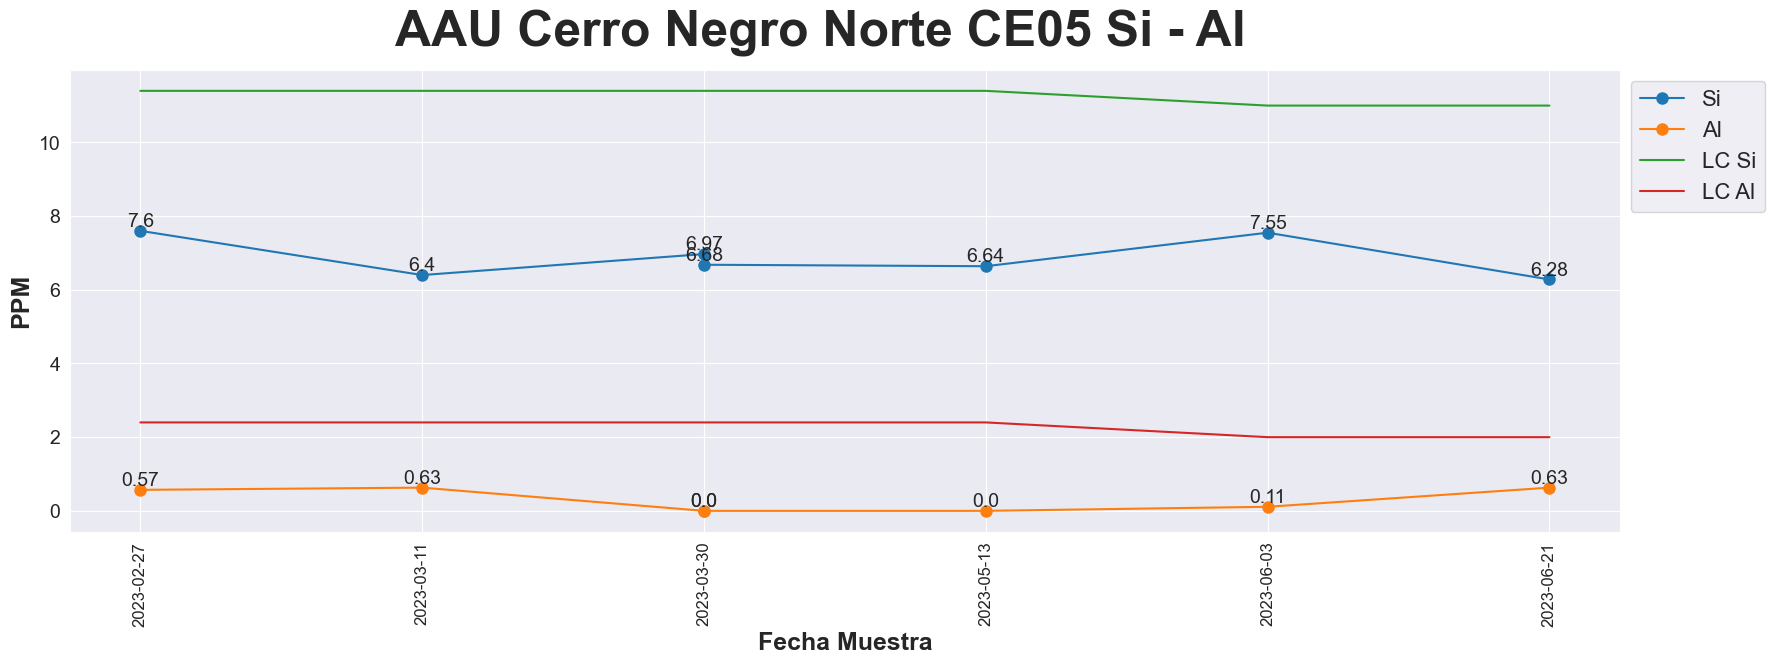

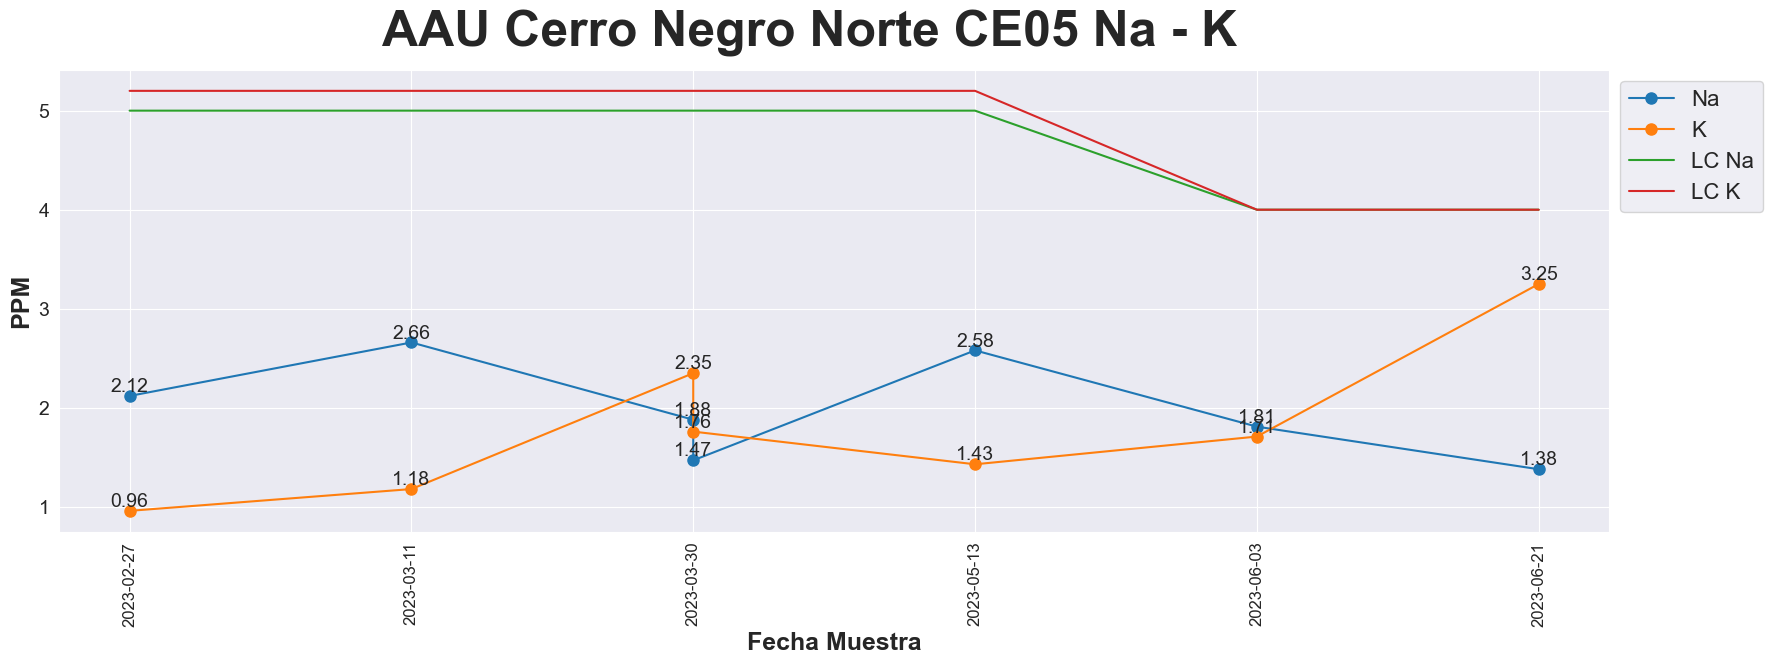

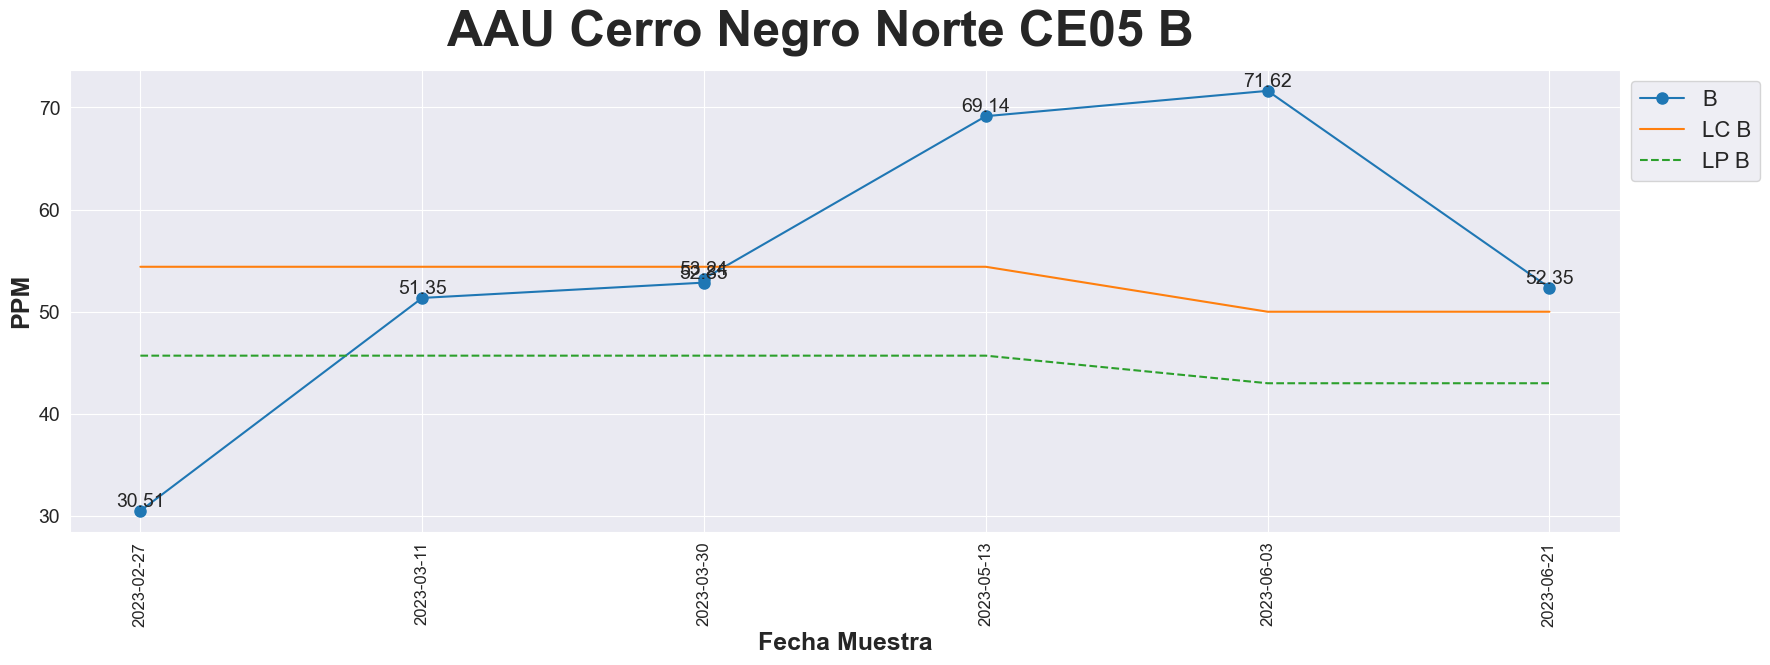

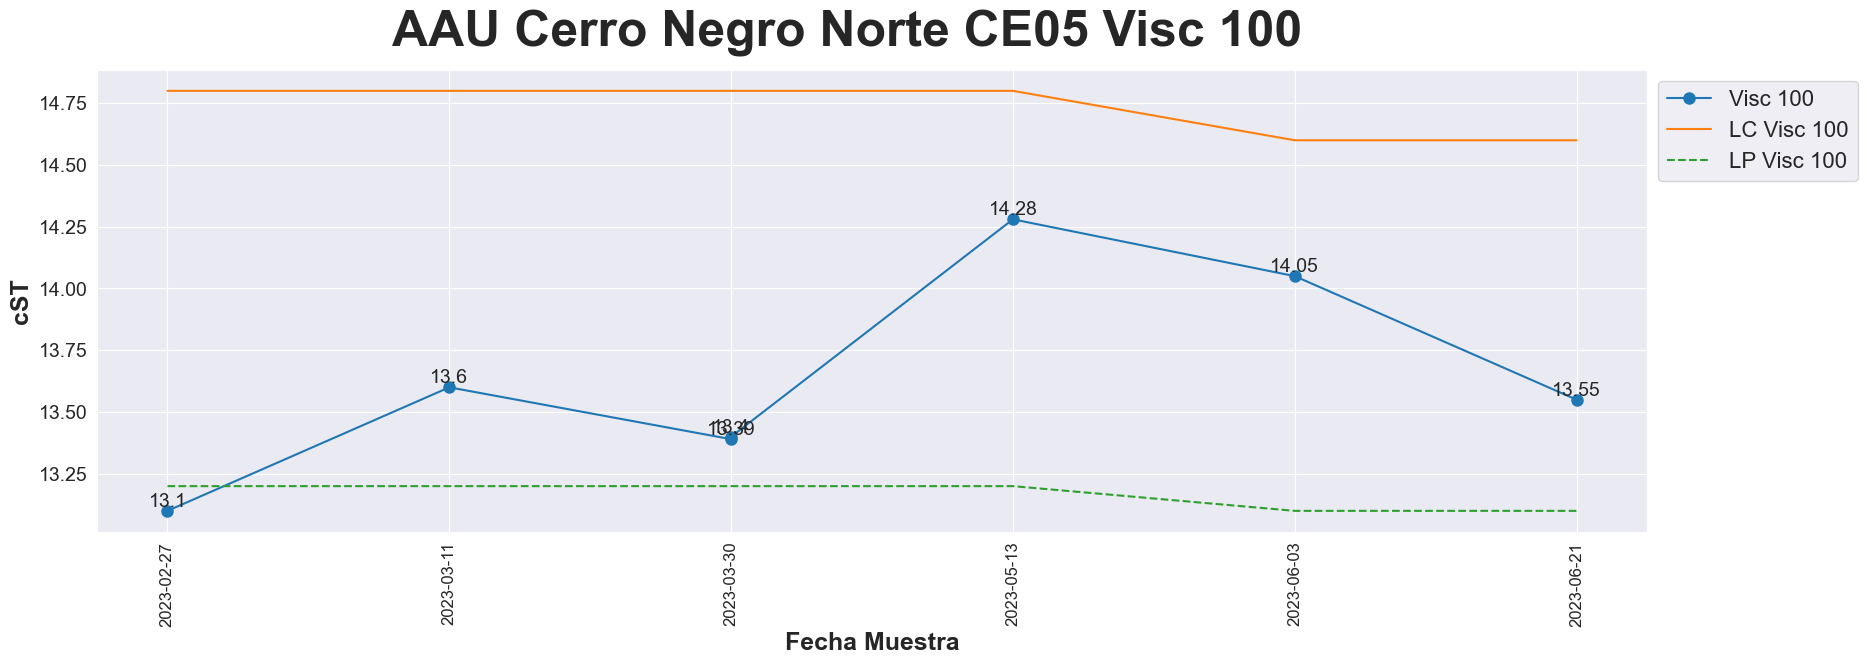

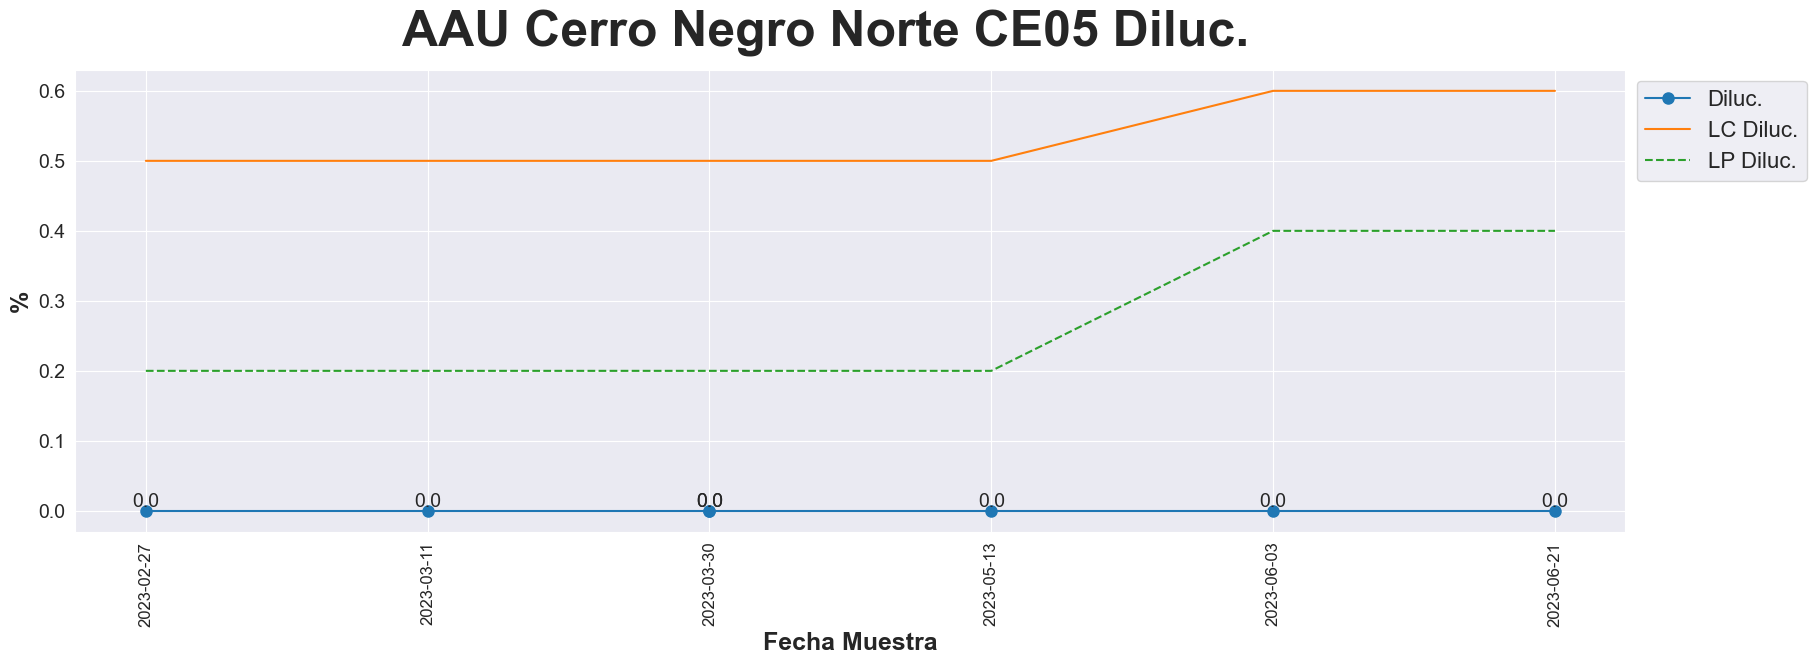

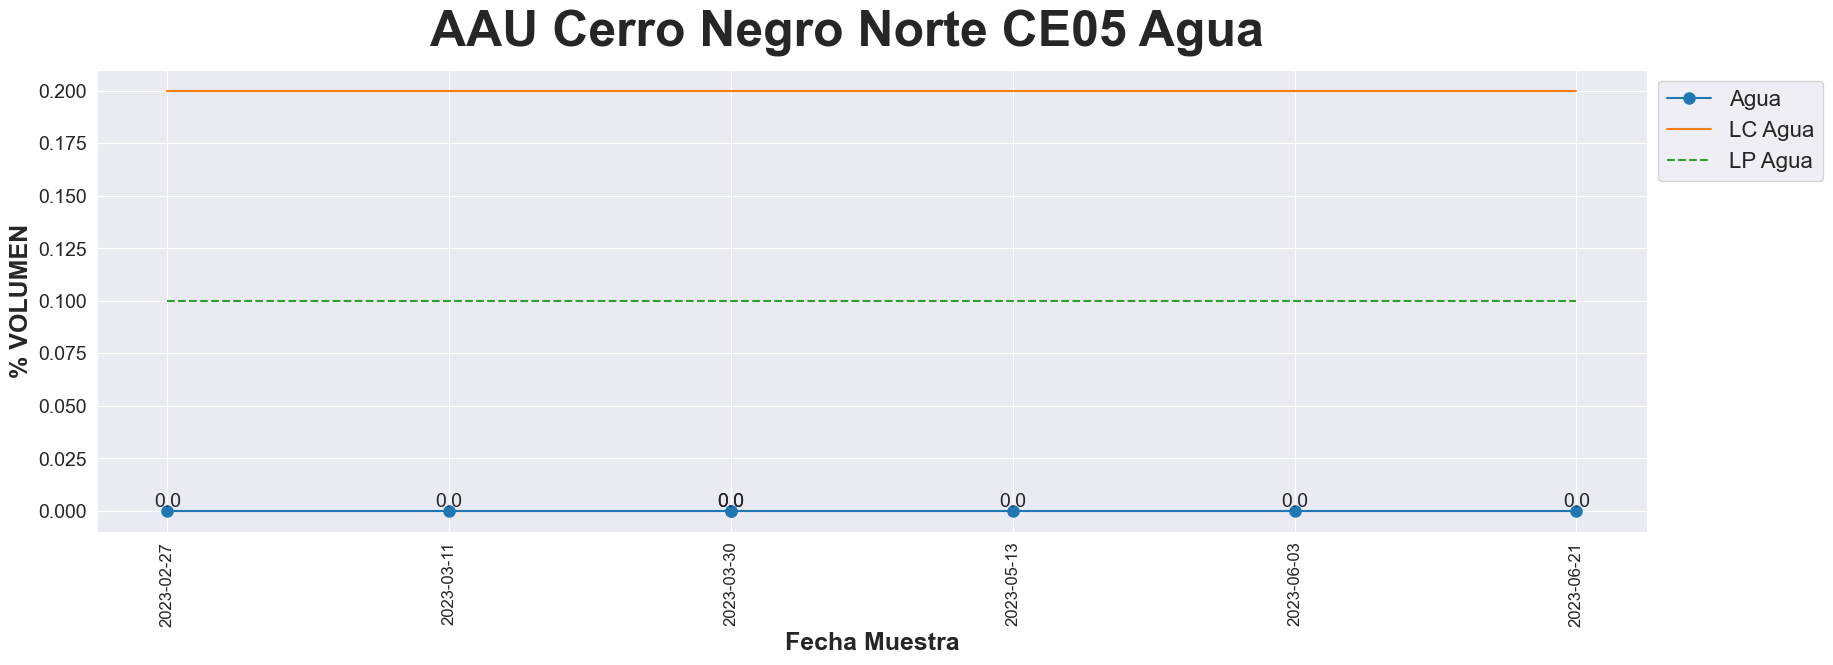

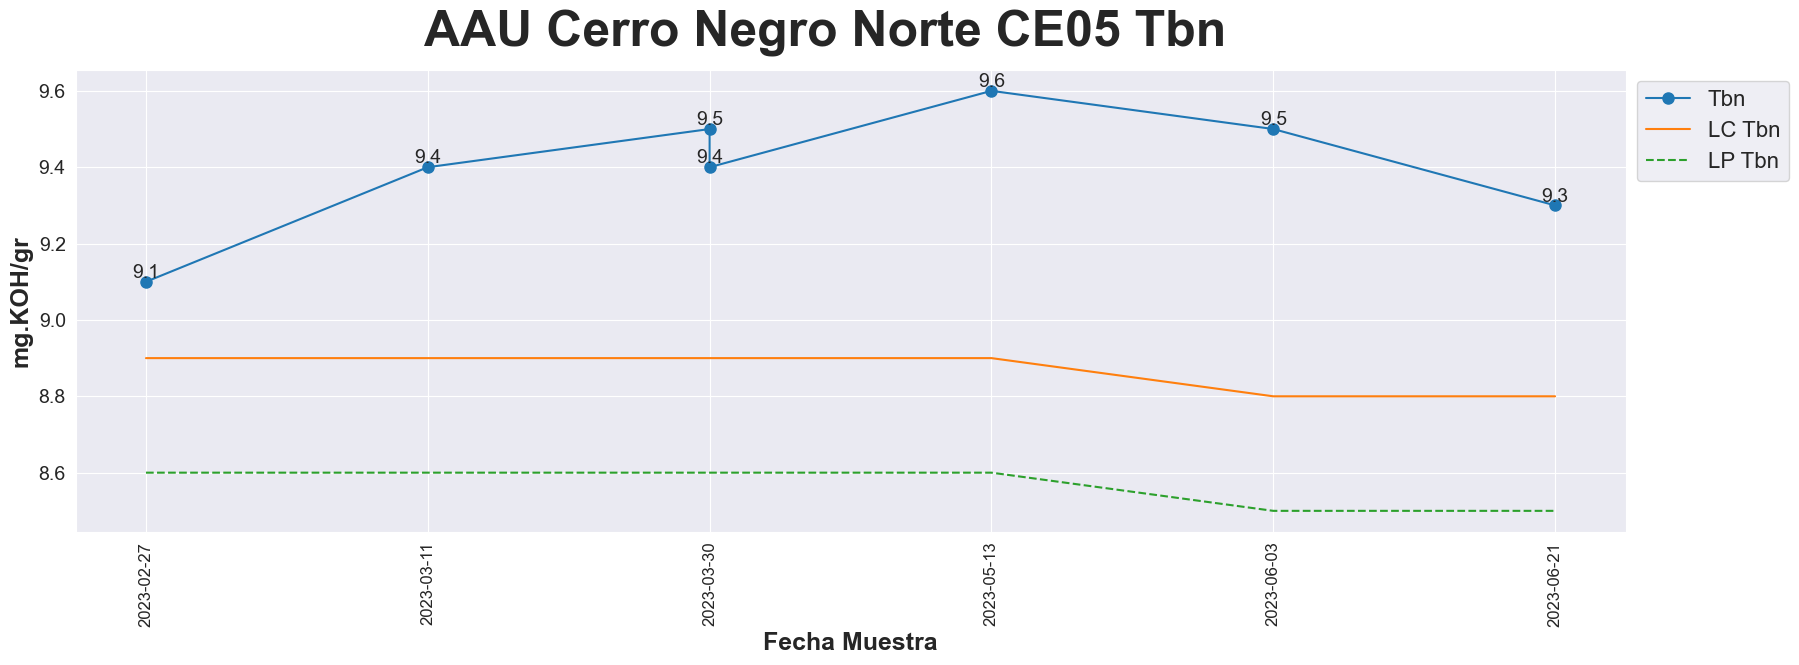

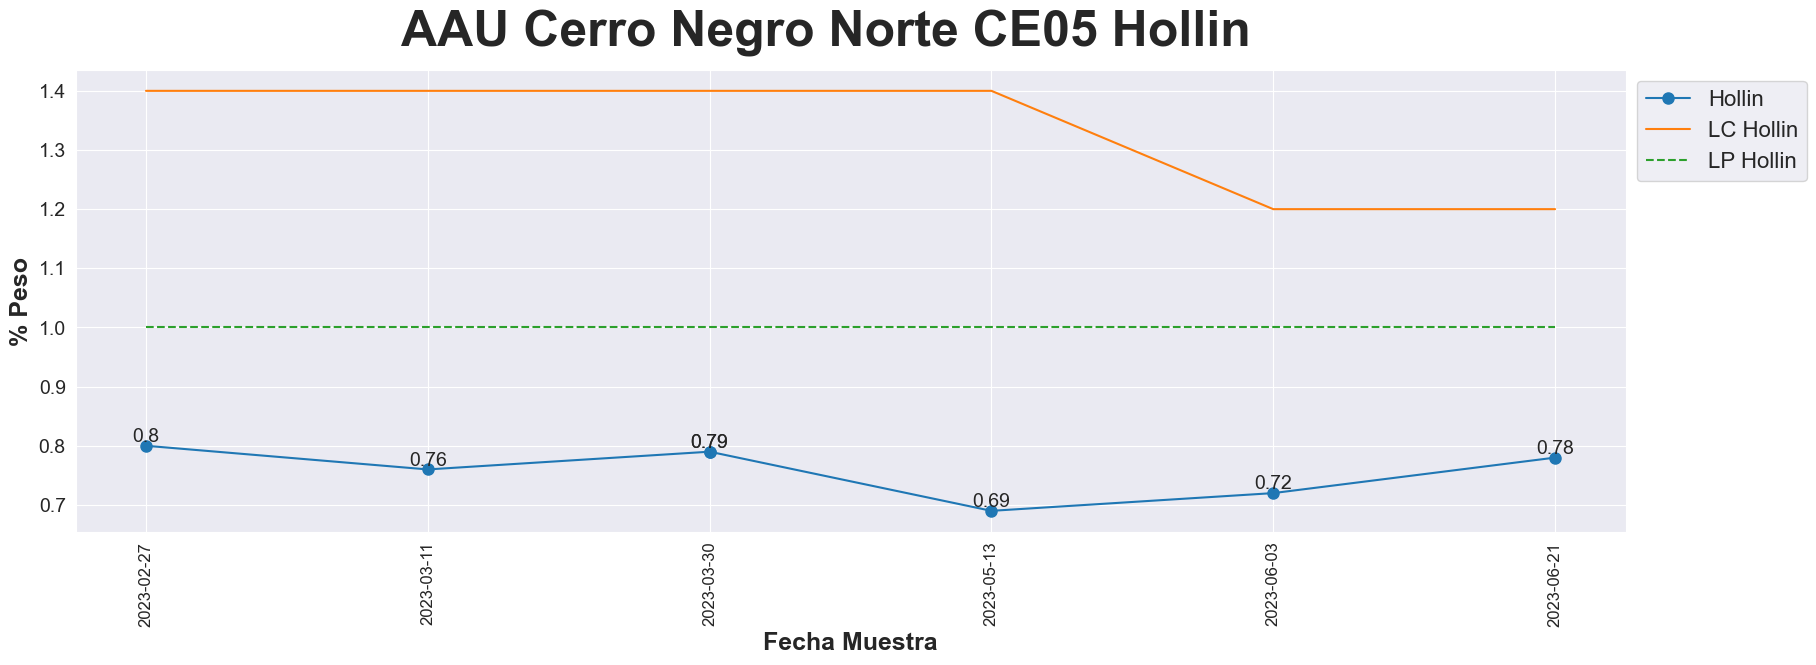

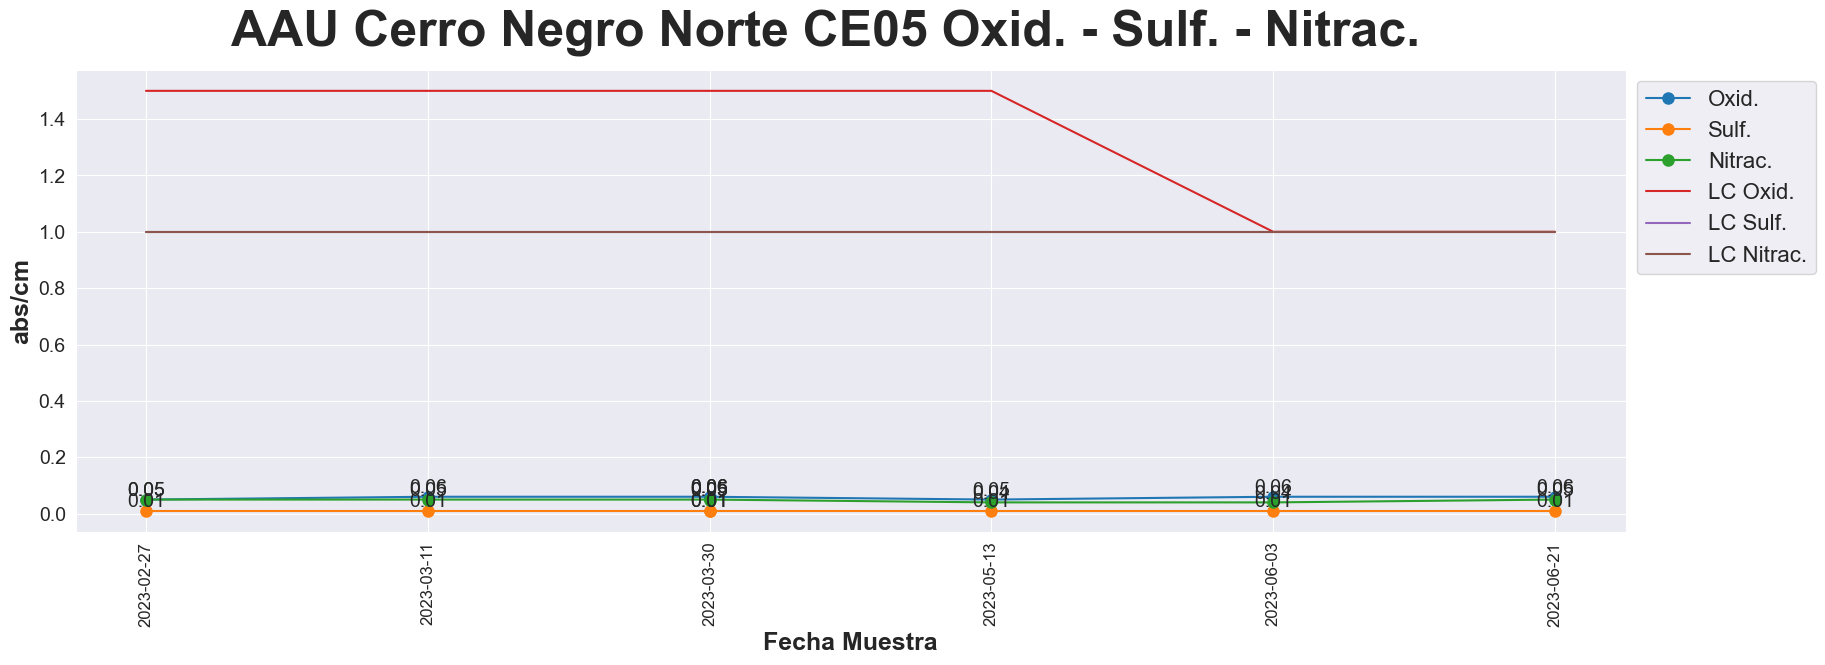

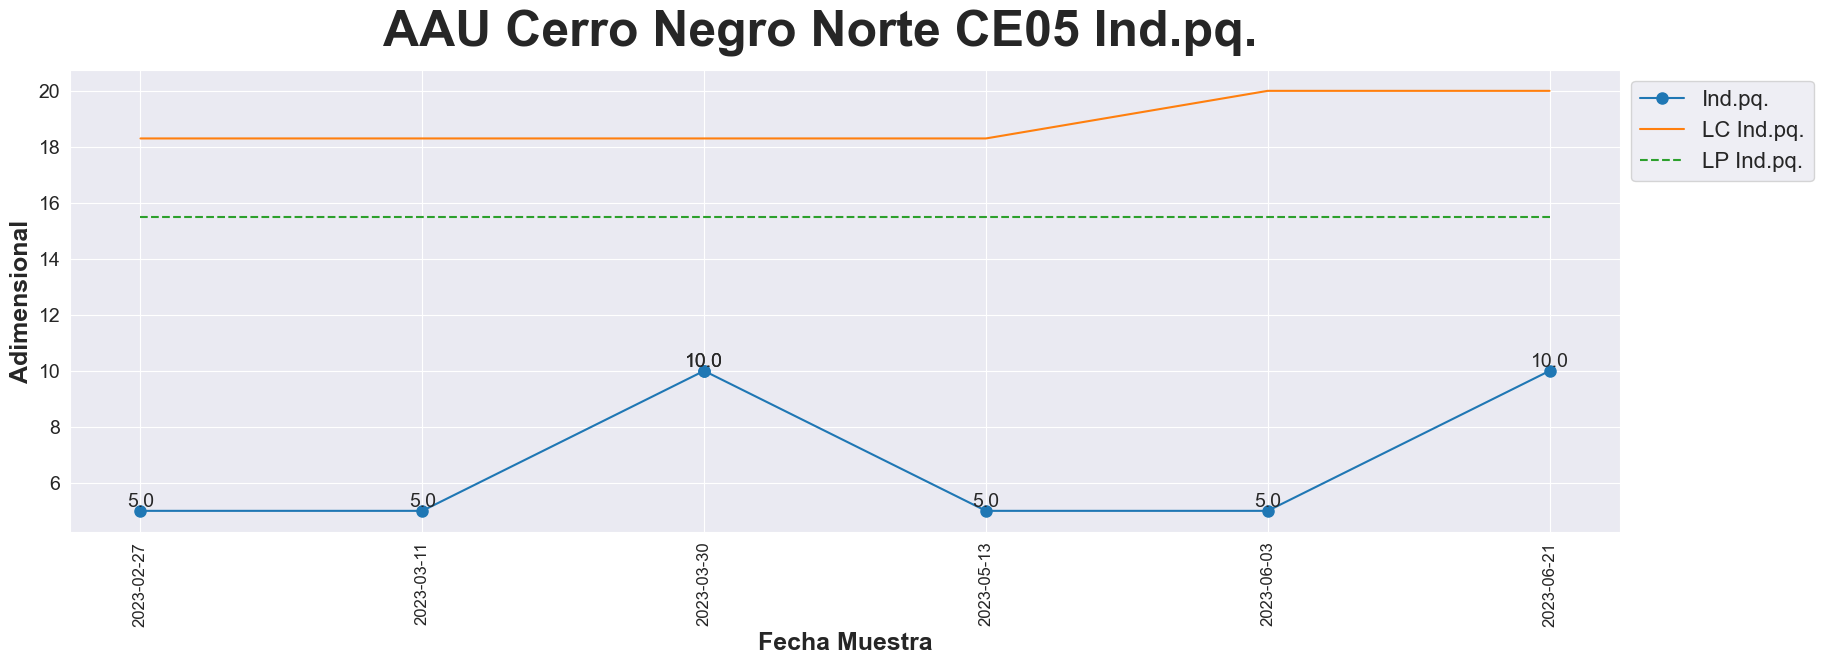

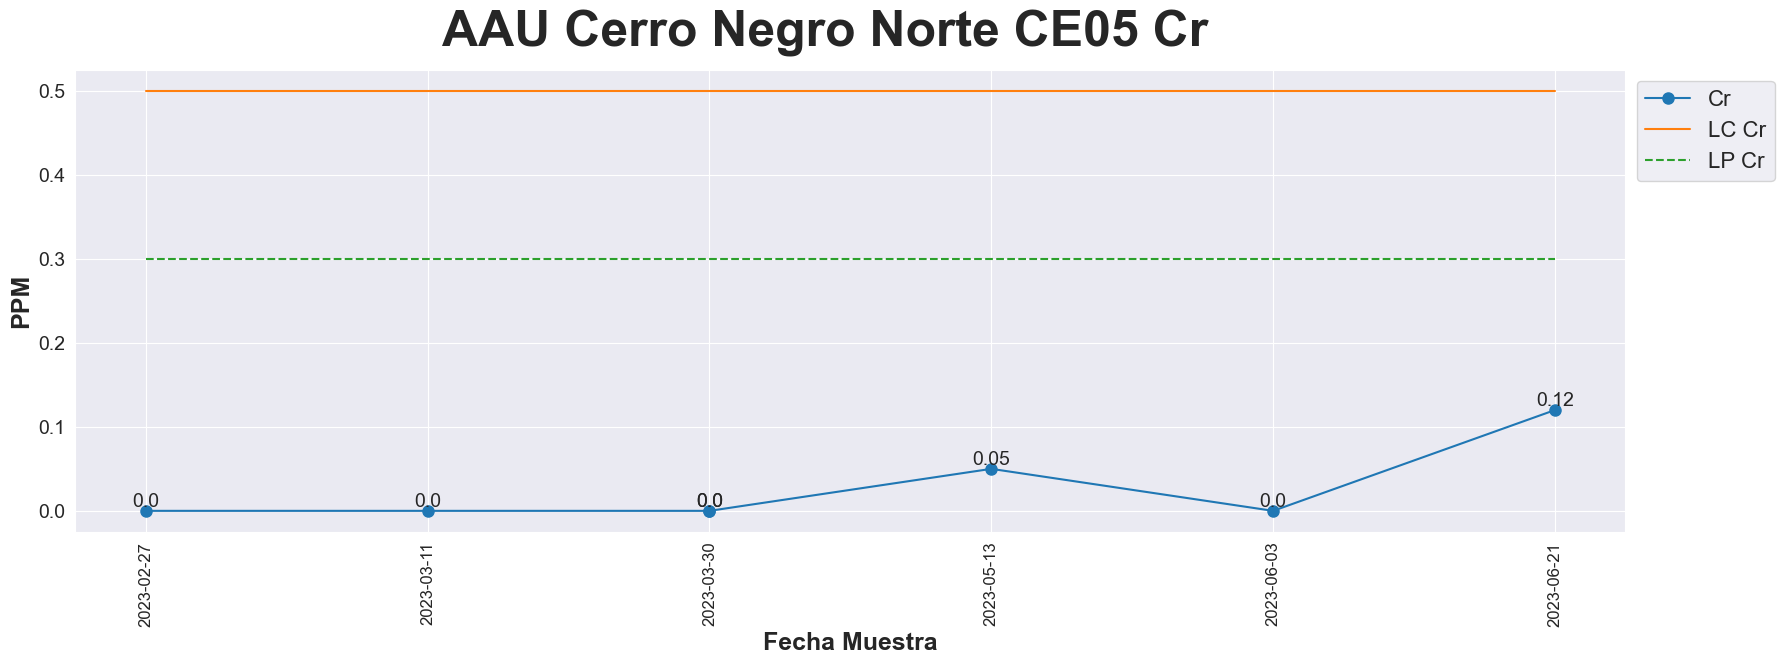

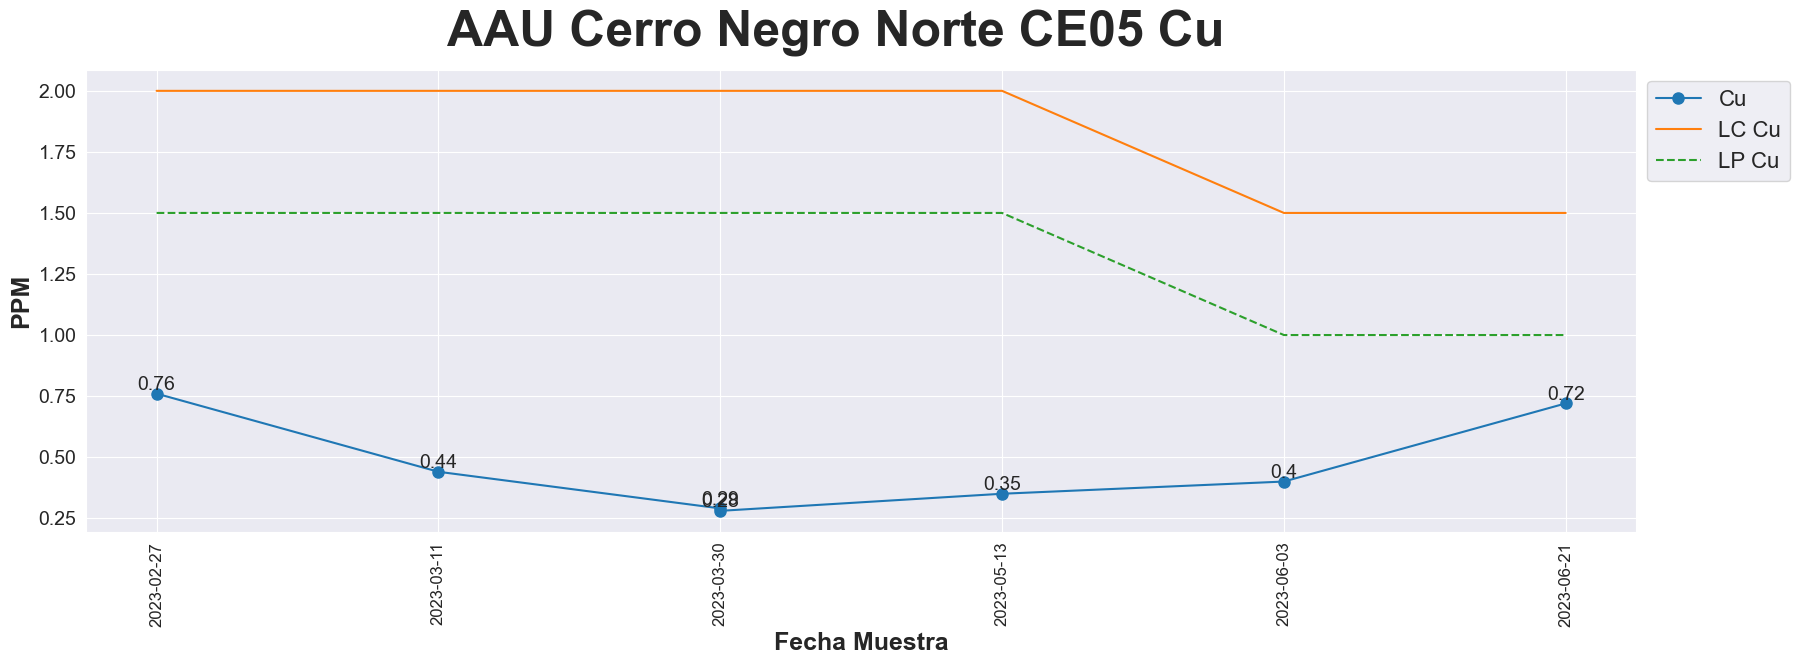

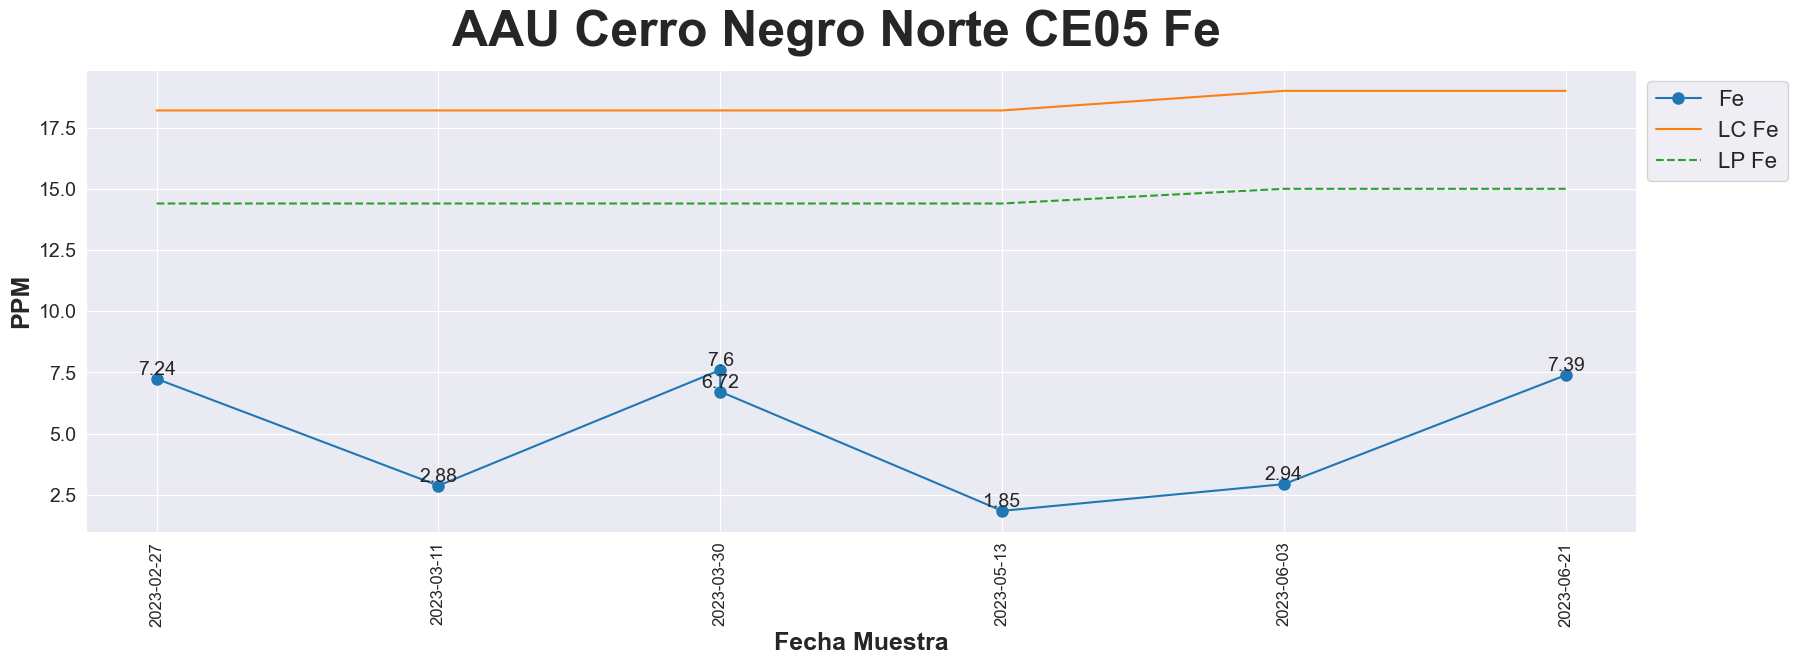

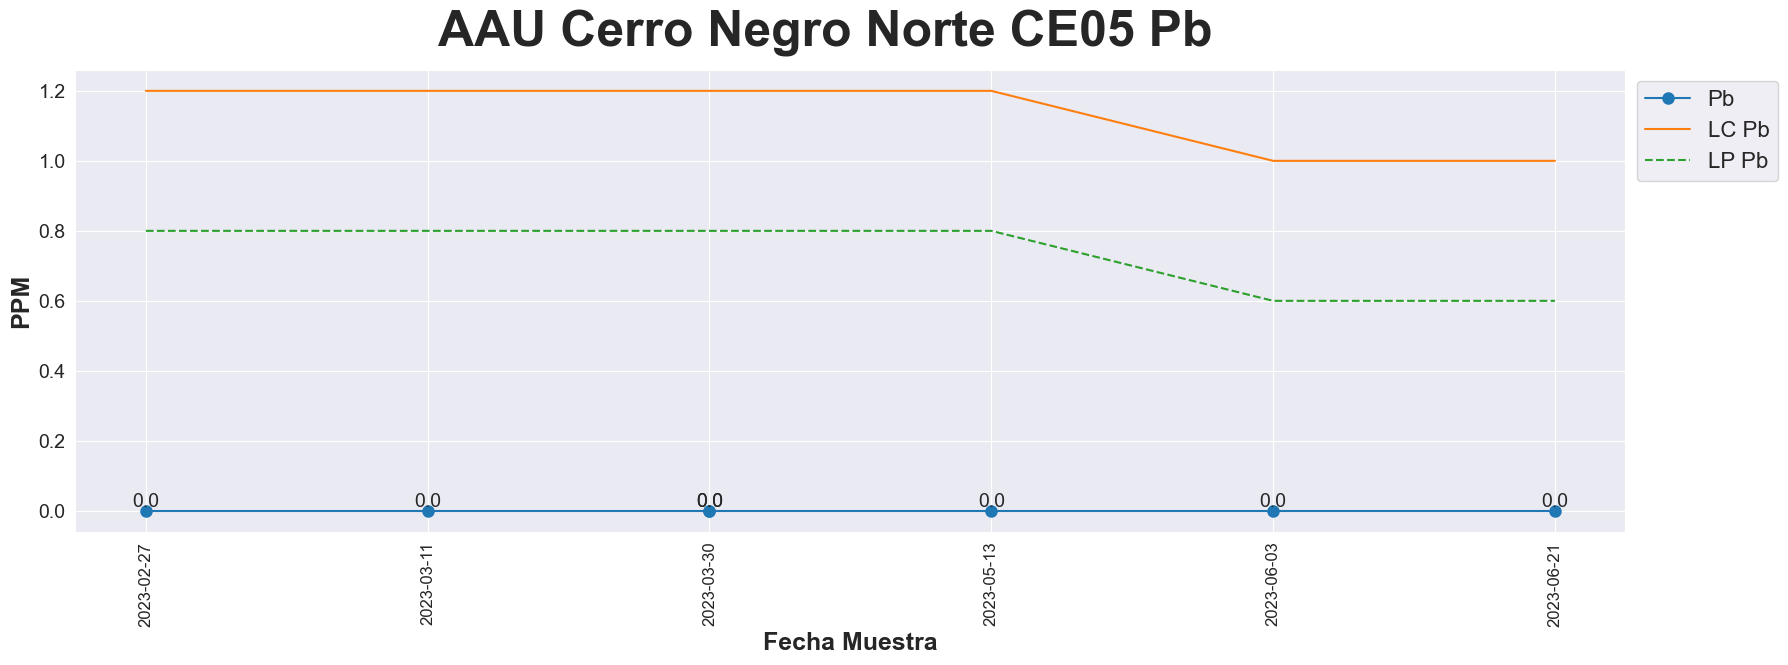

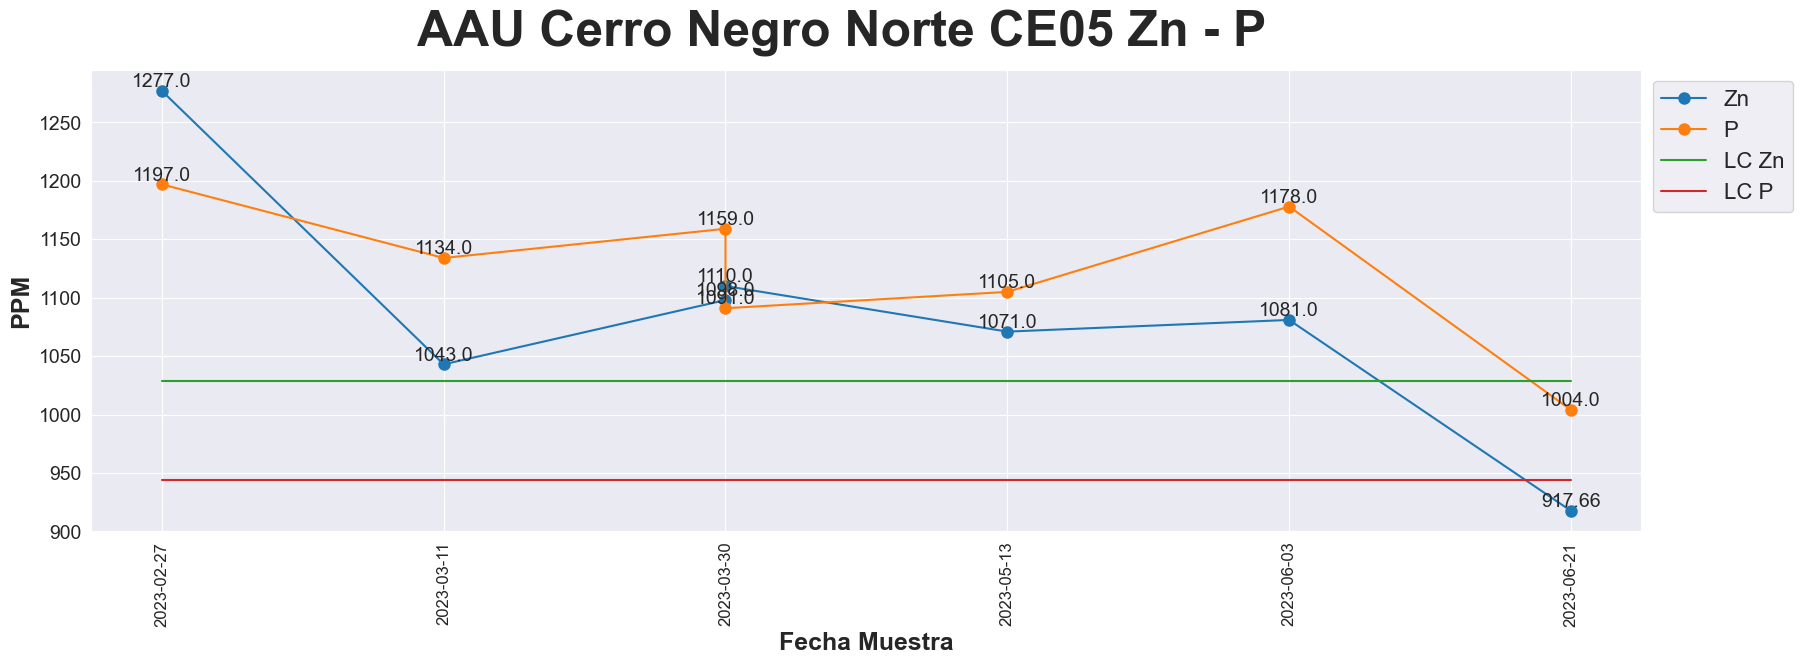

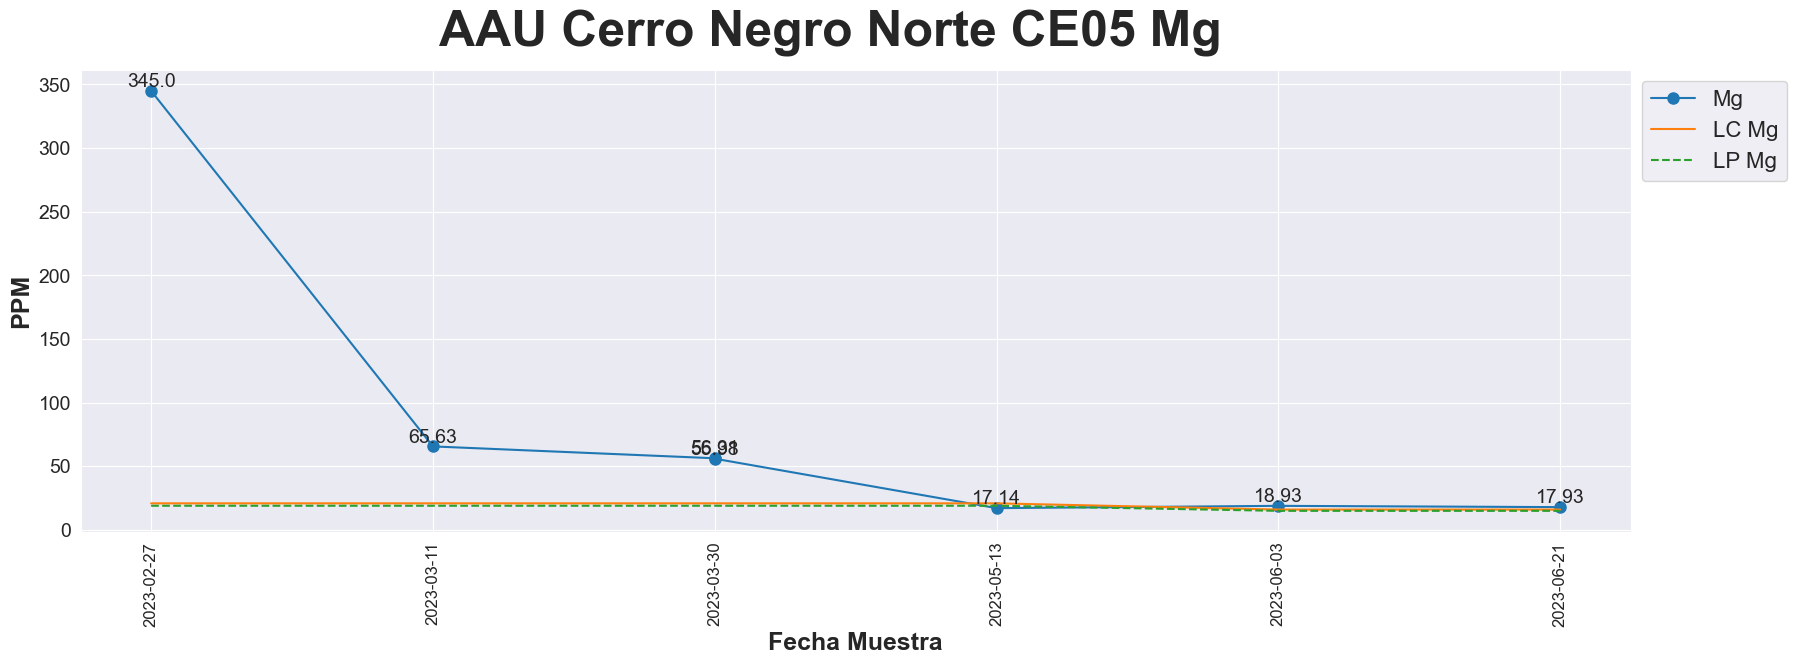

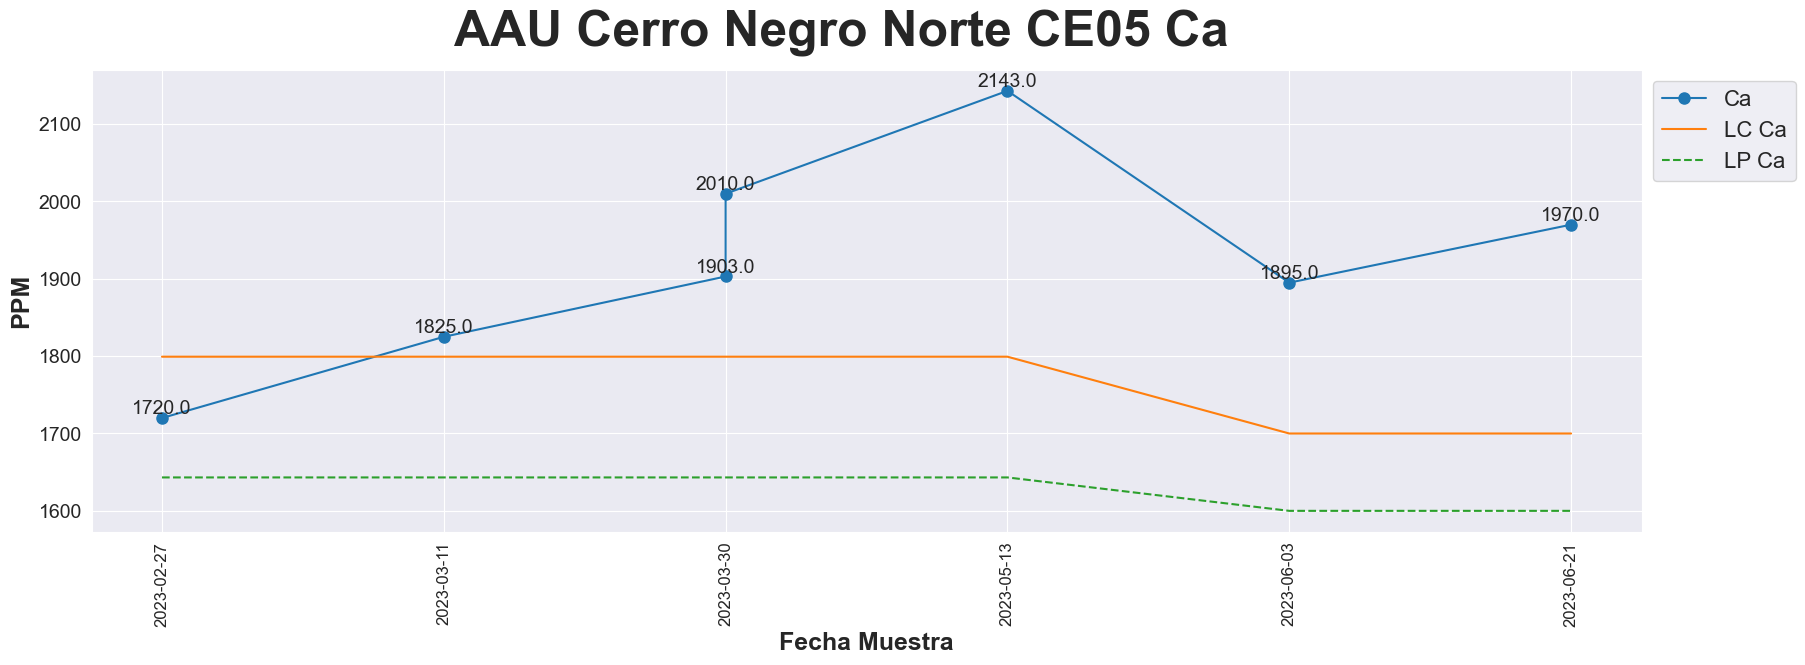

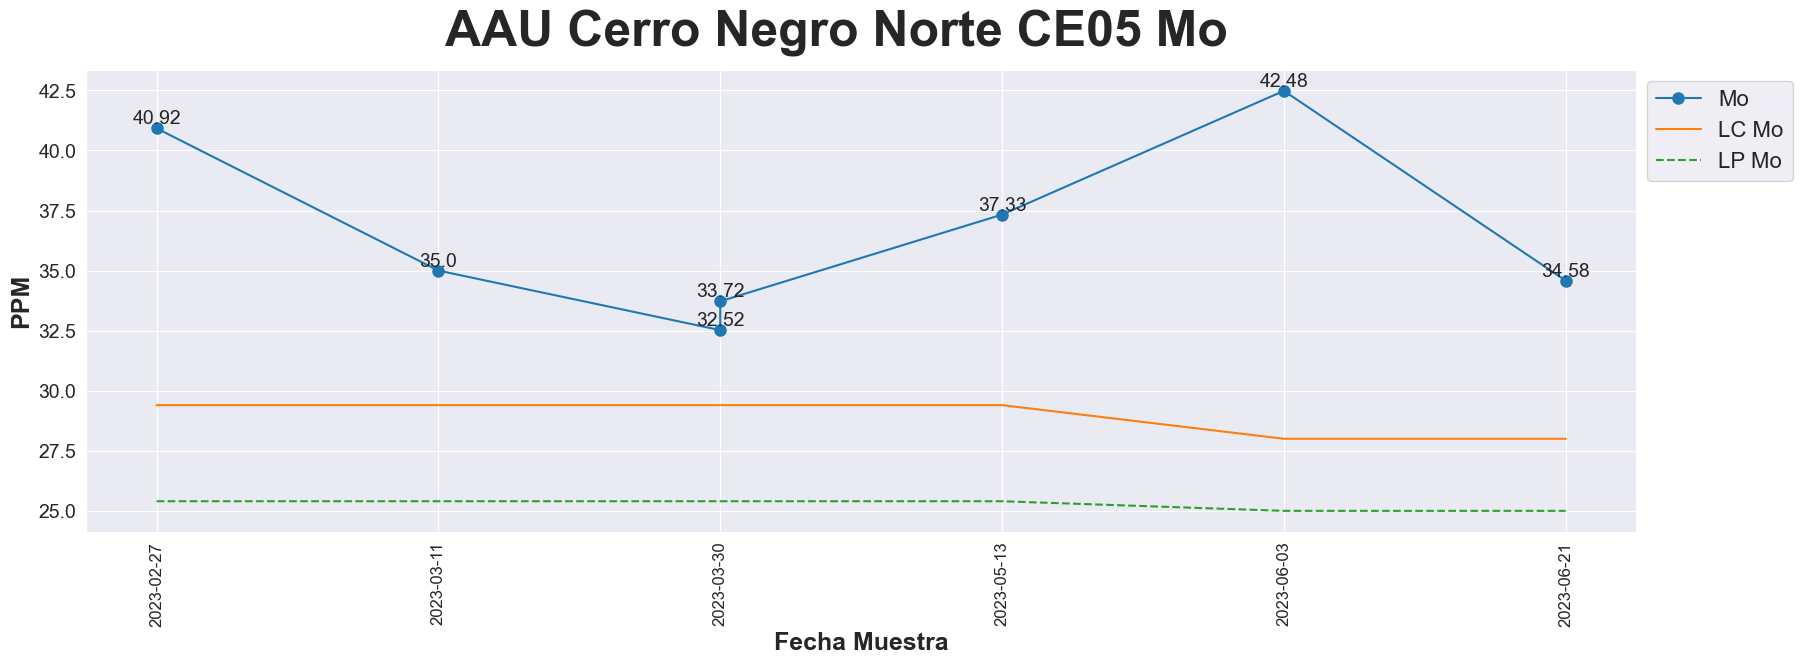

In [58]:

columna_fecha = 'Fecha Muestra'

  
for equipo in lista_equipos:
    scaa_equipo = scaa.copy()[scaa['Equipo'].isin([equipo])]

    flota_equipo = scaa_equipo.Flota.iloc[0].replace("'","")
    with pdf(ruta_guardar_grafico(carpeta_tendencias,faena,flota_equipo,equipo,hasta,subcarpeta)) as image: 
        for elementos in grupo_elementos:
            elementos_capitalizados = list(map(lambda x: x.capitalize(), elementos))
            titulo_elementos = ' - '.join(elementos_capitalizados)

            fig = plt.figure(figsize=(20,6))
            ax = fig.add_subplot(111)  

            # Filtro de limites para el equipo
            
            limites_equipo = limites.copy()
            limites_equipo = limites_equipo[limites_equipo.flota.apply(lambda x:bool(re.search(x.replace(' ','.*'),flota_equipo)))]
            # Titulo de grafico
            plt.suptitle("AAU "+faena+" "+ equipo +" "+titulo_elementos,fontsize=36,fontweight="bold")


            # Grafica Principal
            if False:
                # Grafico con intervalos entre fecha variable
                scaa_equipo.plot(x=columna_fecha, y=elementos,kind="line", 
                                        figsize=(20,6), ax=ax,linewidth=2, 
                                        marker='o',markersize=8,legend=False)
            else:
                # Grafico con intervalo entre fecha fijo
                # ax.margins(y=.1, x=.1)
                scaa_equipo[columna_fecha]=pd.Series(scaa_equipo[columna_fecha], dtype="string") 
                scaa_equipo[elemento]=scaa_equipo[elemento].astype(float)
                for elemento in elementos:
                    ax.plot(columna_fecha, elemento,'o-', data=scaa_equipo,markersize=8)


            if True:
                for i,fila in scaa_equipo.iterrows():
                        for elemento in elementos:
                                ax.annotate(round(fila[elemento],2), (fila[columna_fecha], fila[elemento]),ha='center',va='bottom',fontsize=14)
            # # Etiqueta para cada punto del grafico
            # for idx, row in scaa_equipo.iterrows():
            #     for elemento in grupo_elementos:
            #         ax.annotate(row[elemento], (row[elemento], row[columna_fecha]))
            legend_labels = []
            if not limites_equipo.empty:
                for elemento in elementos:
                    if elemento in limites_equipo.elemento.unique():
                        temp_limites = limites_equipo[limites_equipo.elemento == elemento][['desde','limitecritico','limiteprecaucion']]
                        temp_limites.sort_values('desde', ascending=False, inplace=True)
                        
                        # limites criticos
                        scaa_equipo['limitecritico'] = scaa_equipo['Fecha Muestra'].apply(lambda x: fecha_limites(temp_limites,x,'limitecritico')).astype('float')
                        ax.plot(columna_fecha, 'limitecritico',data=scaa_equipo)
                        legend_labels.append('LC ' + elemento.capitalize())
                        if len(elementos) <= 1:
                            scaa_equipo['limiteprecaucion'] = scaa_equipo['Fecha Muestra'].apply(lambda x: fecha_limites(temp_limites,x,'limiteprecaucion')).astype('float')
                            ax.plot(columna_fecha, 'limiteprecaucion',data=scaa_equipo,ls='--')
                            legend_labels.append('LP ' + elemento.capitalize())

            # Etiqueta de ejes
            ax.set_xlabel("Fecha Muestra",fontsize=18,fontweight="bold")
            # if elementos[0] in limites_equipo.elemento.unique():
            ax.set_ylabel(unidades[elementos[0]],fontsize=18,fontweight="bold")
            # ax.xlim(0, 0.045)
            ax.tick_params(axis='x', labelrotation=90,labelsize=12)
            ax.tick_params(axis='y',labelsize=14)
            ax.legend(labels=elementos_capitalizados + legend_labels,loc=2, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes,fontsize=16)  
            image.savefig(fig, bbox_inches='tight',dpi=100)   